In [92]:
#Importing basic libraries of pandas and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Please use seaborn 0.9 version, else catplot code will not be executed

#Loading the Uber data set
uber_df = pd.read_csv('./Uber Request Data.csv',skipinitialspace=True)


In [94]:
#Checking Basic info and statistics of data frame
print(uber_df.head())
print(uber_df.info())

   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int

In [95]:
#checking null values
uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
# I would neglect the null values since null is coming for the status="No Cars Available", which is expected case
# and which data is also needed for analysis.

In [96]:
# convert datetime type of column in pyhton datetime format

import datetime as dt

uber_df['Request timestamp']= pd.to_datetime(uber_df['Request timestamp'], infer_datetime_format=True,dayfirst=True)
uber_df['Drop timestamp']= pd.to_datetime(uber_df['Drop timestamp'], infer_datetime_format=True,dayfirst=True)

In [97]:
# getting the day of the slot according to the time period

def getDaySlot(time):
    if(time >=4 and time<8):
        print(time<8)
        return 'early morning'
    elif(time >=8 and time<12):
        return 'late morning'
    elif(time >=12 and time<16):
        return 'early afternoon'
    elif(time >=16 and time<20):
        return 'late afternoon'
    elif(time >=20 and time<24):
        return 'early night'
    elif(time >=0 and time<4):
        return 'late night'
    else:
        return time


In [98]:
#adding request_hour,drop_hour column so that i can analyse no of request hourly basis.
uber_df['request_hour'] = uber_df['Request timestamp'].dt.hour
uber_df['drop_hour'] = uber_df['Drop timestamp'].dt.hour


In [99]:
# Adding slots of the day e.g early morning, late night to do analysis furthur

uber_df['drop_dayslot'] = uber_df['drop_hour'].apply(getDaySlot)
uber_df['request_dayslot'] = uber_df['request_hour'].apply(getDaySlot)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


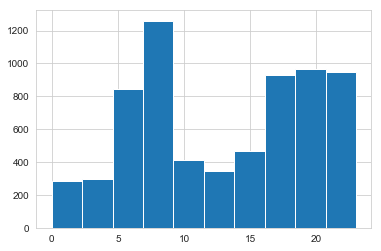

In [11]:
#analysisn max no of requests as per hours
plt.hist(df['request_hour'])
plt.show()

In [100]:
#getting frequency of cancelled request or show no cars availabel as whole
trip_type = uber_df.groupby(['Status'])['request_dayslot'].count()
print(trip_type)

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: request_dayslot, dtype: int64


In [101]:
#getting frequency of cancelled request or show no cars availabel as per day slots
trip_dayslotwise = df.groupby(['Status','request_dayslot']).count()
print(trip_dayslotwise)

                                   Request id  Pickup point  Driver id  \
Status            request_dayslot                                        
Cancelled         early afternoon          69            69         69   
                  early morning           541           541        541   
                  early night             105           105        105   
                  late afternoon          105           105        105   
                  late morning            430           430        430   
                  late night               14            14         14   
No Cars Available early afternoon         182           182          0   
                  early morning           307           307          0   
                  early night             774           774          0   
                  late afternoon          883           883          0   
                  late morning            279           279          0   
                  late night          

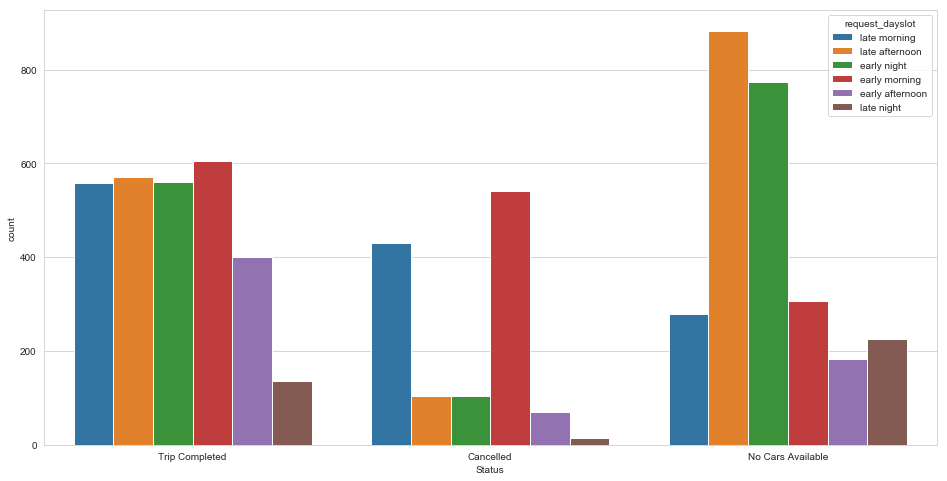

In [15]:
#Task 1
#Visually identify the most pressing problems for Uber. 
#Task 1.1- Hint: Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; 

plt.figure(figsize=(16, 8))
sns.countplot(x="Status", hue="request_dayslot",data=uber_df)
plt.show()

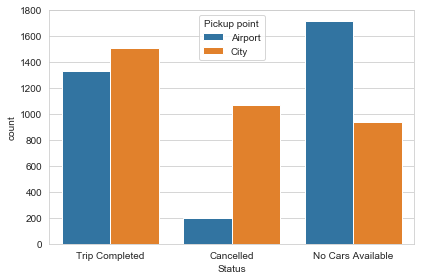

In [102]:
#Task 1.2 - Identifying most problematic requests, is it from city or from  airport
graph = sns.countplot(x="Status",  hue="Pickup point",data=df)
plt.tight_layout()
#It clearly shows there is huge difference between car availabilty at airport vs city.

<Figure size 1440x720 with 0 Axes>

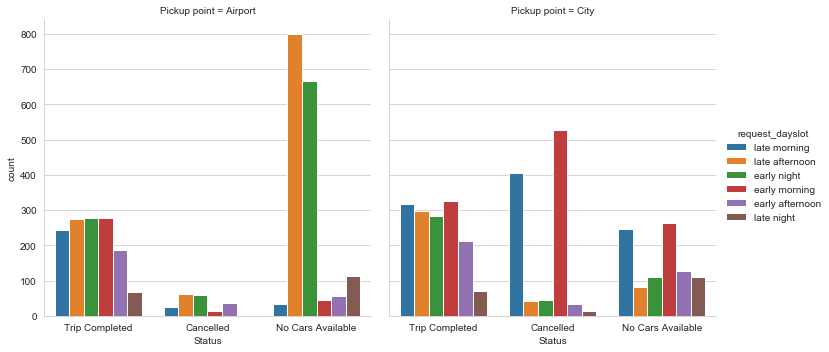

In [104]:
#Identifying most problematic requests, is it from city or from  airport and at which day slot
plt.figure(figsize=(20, 10))
graph = sns.catplot(x="Status",col="Pickup point", hue="request_dayslot",  kind="count", data=df)
#It shows late afternoon and early night, there were less car avaiablity at airport
#It also shows there are max cancellation done at city in early morning

In [105]:
#-----------------  supply demand analysis -------------------------#
#Supply = Trip completed
#Demand = Trip completed + No Cars Available + Cancelled

df.head(20) 
supply_df=uber_df[uber_df.Status=="Trip Completed"]
print(supply_df)

      Request id Pickup point  Driver id          Status   Request timestamp  \
0            619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1            867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2           1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3           2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4           3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
5           3879      Airport        1.0  Trip Completed 2016-07-13 21:57:28   
6           4270      Airport        1.0  Trip Completed 2016-07-14 06:15:32   
7           5510      Airport        1.0  Trip Completed 2016-07-15 05:11:52   
8           6248         City        1.0  Trip Completed 2016-07-15 17:57:27   
9            267         City        2.0  Trip Completed 2016-07-11 06:46:00   
10          1467      Airport        2.0  Trip Completed 2016-07-12 05:08:00   
11          1983         City        2.0

In [106]:
# Check the supply of the cars in discrete values as per dayslots
supply_df.groupby(['Pickup point','drop_dayslot'])["Request id"].count()

Pickup point  drop_dayslot   
Airport       early afternoon    187
              early morning      228
              early night        293
              late afternoon     244
              late morning       261
              late night         114
City          early afternoon    226
              early morning      251
              early night        312
              late afternoon     274
              late morning       348
              late night          93
Name: Request id, dtype: int64

<Figure size 1440x720 with 0 Axes>

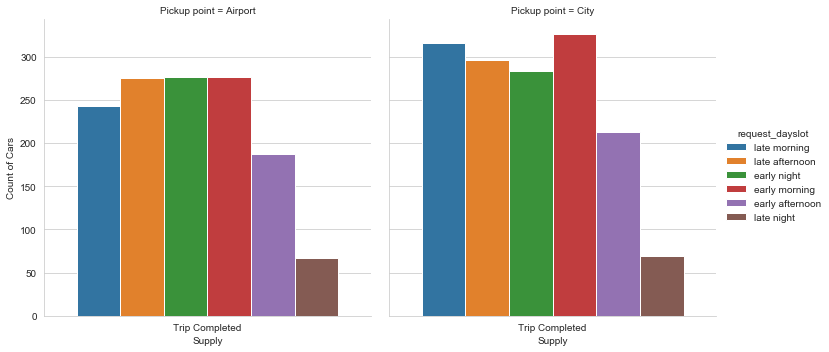

In [108]:
#see supply in plot
plt.figure(figsize=(20, 10))
s = sns.catplot(x="Status",col="Pickup point", hue="request_dayslot",  kind="count", data=supply_df)
s.set_axis_labels("Supply", "Count of Cars")

In [109]:
#calculating demand 
demand_df=uber_df[(uber_df.Status=="Trip Completed") | (uber_df.Status=="Cancelled") | (uber_df.Status=="No Cars Available")]
print(demand_df)

      Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Compl

In [110]:
# see demands in descrete values
demand_df.groupby(['Pickup point','request_dayslot'])["Request id"].count()

Pickup point  request_dayslot
Airport       early afternoon     278
              early morning       336
              early night        1002
              late afternoon     1140
              late morning        301
              late night          181
City          early afternoon     373
              early morning      1116
              early night         437
              late afternoon      420
              late morning        967
              late night          194
Name: Request id, dtype: int64

<Figure size 1440x720 with 0 Axes>

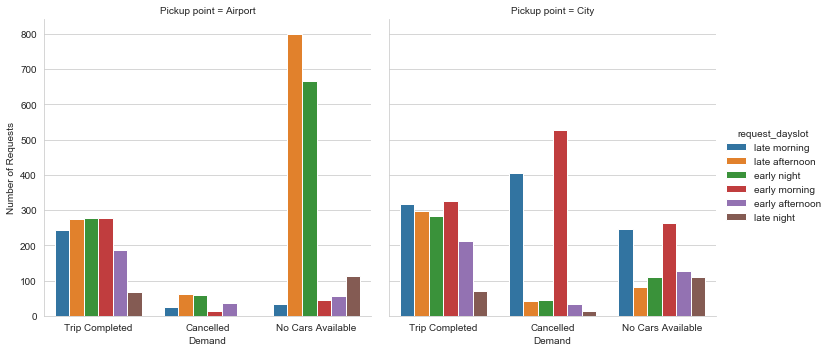

In [76]:
# see demands in plots
plt.figure(figsize=(20, 10))
d = sns.catplot(x="Status",col="Pickup point", hue="request_dayslot",  kind="count", data=demand_df)
d.set_axis_labels("Demand", "Number of Requests")

In [120]:
# comparision demand vs supply with concerete values
d=demand_df.groupby(['Pickup point','request_dayslot'])["Request id"].count()
s=supply_df.groupby(['Pickup point','drop_dayslot'])["Request id"].count()
print(d)
print(s)
df = pd.DataFrame([d,s])
df.info()
df.head()

Pickup point  request_dayslot
Airport       early afternoon     278
              early morning       336
              early night        1002
              late afternoon     1140
              late morning        301
              late night          181
City          early afternoon     373
              early morning      1116
              early night         437
              late afternoon      420
              late morning        967
              late night          194
Name: Request id, dtype: int64
Pickup point  drop_dayslot   
Airport       early afternoon    187
              early morning      228
              early night        293
              late afternoon     244
              late morning       261
              late night         114
City          early afternoon    226
              early morning      251
              early night        312
              late afternoon     274
              late morning       348
              late night          93
Name: Req

Pickup point            Airport                                           \
request_dayslot early afternoon early morning early night late afternoon   
Request id                  278           336        1002           1140   
Request id                  187           228         293            244   

Pickup point                                       City                \
request_dayslot late morning late night early afternoon early morning   
Request id               301        181             373          1116   
Request id               261        114             226           251   

Pickup point                                                        
request_dayslot early night late afternoon late morning late night  
Request id              437            420          967        194  
Request id              312            274          348         93